In [1]:
from __future__ import print_function
import sys
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
import svm_old
from svm import *

In [3]:
y = np.loadtxt("data/target.txt")
X = np.loadtxt("data/features.txt", delimiter=',')
C = 100

## GD, SGD and mini-batch SGD

In this part we compare the performance of
* gradient descent (GD)
* stochastic gradient descent (SGD)
* mini-batch stochastic gradient descent

#### Some comments
Before proceding, there is one thing needed to be pointed out on SGD.
The procedure presented in the homework instruction is not the standard SGD.
Since you did not learn SGD in class, the point of homework is for you to know the general idea, so it skips several technical points, which however are important to guarantee the performance of SGD (as you will see below).

The missing technical points are
1. The stepsize $\eta$ need to decrease with a certain rate.  
   This is required, even just theoretically, to guarantee the convergence (rate).  
   Usually we set
   $$\eta = \frac{C_0}{k}$$
   in the $k$th iteration, for some constant $C_0$;
   
2. The gradient needs to be an unbiased estimator of the true gradient.  
   This requires we use
   $$w = w - \eta\cdot n\nabla_w f(w, b; x_i, y_i)$$
   $$b = b - \eta\cdot n\nabla_b f(w, b; x_i, y_i)$$
   in SGD, and
   $$w = w - \eta\cdot \frac{n}{\ell} \sum_{i\in\text{batch}_\ell}\nabla_wf(w, b; x_i, y_i)$$
   $$b = b - \eta\cdot \frac{n}{\ell} \sum_{i\in\text{batch}_\ell}\nabla_bf(w, b; x_i, y_i)$$
   in mini-batch SGD. Again, the $\eta$ should be updated as in 1.
   
#### About code
Here I code a small module in python call SVM.
It is first coded based on homework instruction, which I saved as svm_old.py
Then changed to include the above modification on SGD, which is the final svm.py

First let's look at svm_old

In [4]:
svm_obj = svm_old.svm(y, X, C, fig=True)[2]
sgdsvm_obj = svm_old.sgd_svm(y, X, C, fig=True)[2]
mnbatsvm_obj = svm_old.mnBat_svm(y, X, C, fig=True)[2]

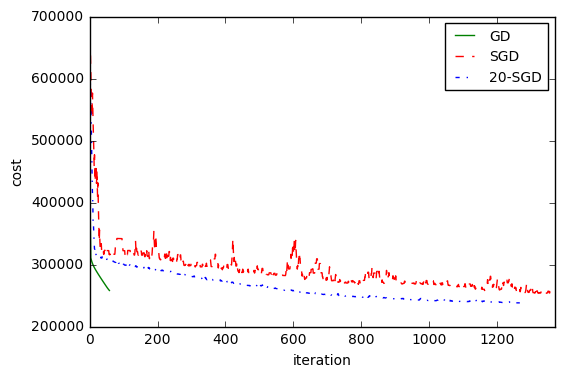

In [5]:
plt.plot(svm_obj, 'g-', label='GD')
plt.plot(sgdsvm_obj, 'r--', label='SGD')
plt.plot(mnbatsvm_obj, 'b-.', label='20-SGD')
plt.xlim(0, max(len(svm_obj), len(sgdsvm_obj), len(mnbatsvm_obj)))
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend(fontsize=10)
plt.show()

We can see that SGD and mini-batch SGD takes longer iteration to achieve similar reduce in cost, which makes sense, since GD aggregates many iterations in SGD in one step. So GD takes longer in each step, while SGD is much faster in each step and is usually faster in total.

In [6]:
repeat = 30
svm_time = []
sgdsvm_time = []
mnbatsvm_time = []

for i in xrange(repeat):
    start = time.time()
    svm_old.svm(y, X, C)
    end = time.time()
    svm_time.append(end - start)

    start = time.time()
    svm_old.sgd_svm(y, X, C)
    end = time.time()
    sgdsvm_time.append(end - start)

    start = time.time()
    svm_old.mnBat_svm(y, X, C)
    end = time.time()
    mnbatsvm_time.append(end - start)

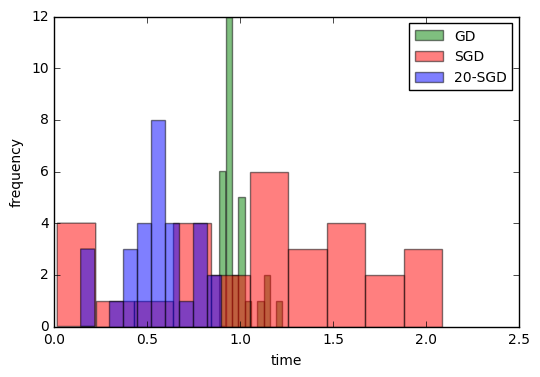

In [7]:
plt.hist(svm_time, color='g', alpha=0.5, label='GD')
plt.hist(sgdsvm_time, color='r', alpha=0.5, label='SGD')
plt.hist(mnbatsvm_time, color='b', alpha=0.5, label='20-SGD')
plt.xlabel('time')
plt.ylabel('frequency')
plt.legend(fontsize=10)
plt.show()

From the figure we can see that, mini-batch SGD is slightly faster than GD, but SGD really performs bad, in terms of large variation on time consumed. The reason for this is because the fixed step size and unnormalized gradient.

Now we use the svm module.

In [4]:
svm_obj = svm(y, X, C, fig=True)[2]
sgdsvm_obj = sgd_svm(y, X, C, fig=True)[2]
mnbatsvm_obj = mnBat_svm(y, X, C, fig=True)[2]

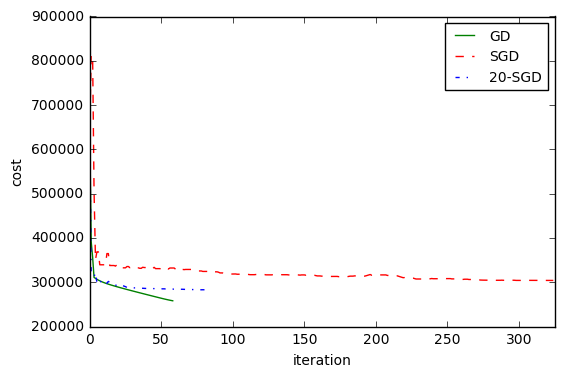

In [5]:
plt.plot(svm_obj, 'g-', label='GD')
plt.plot(sgdsvm_obj, 'r--', label='SGD')
plt.plot(mnbatsvm_obj, 'b-.', label='20-SGD')
plt.xlim(0, max(len(svm_obj), len(sgdsvm_obj), len(mnbatsvm_obj)))
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend(fontsize=10)
plt.show()

First thing we can observe is that, much smaller iteration is needed by SGD methods, especially for mini-batch SGD. The following histogram on time consumed can tell more.

In [6]:
repeat = 30
svm_time = []
sgdsvm_time = []
mnbatsvm_time = []

for i in xrange(repeat):
    start = time.time()
    svm(y, X, C)
    end = time.time()
    svm_time.append(end - start)

    start = time.time()
    sgd_svm(y, X, C)
    end = time.time()
    sgdsvm_time.append(end - start)

    start = time.time()
    mnBat_svm(y, X, C)
    end = time.time()
    mnbatsvm_time.append(end - start)

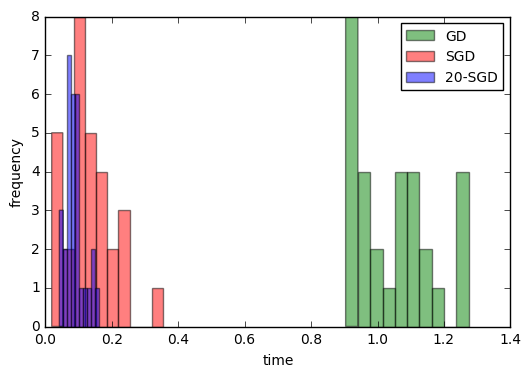

In [7]:
plt.hist(svm_time, color='g', alpha=0.5, label='GD')
plt.hist(sgdsvm_time, color='r', alpha=0.5, label='SGD')
plt.hist(mnbatsvm_time, color='b', alpha=0.5, label='20-SGD')
plt.xlabel('time')
plt.ylabel('frequency')
plt.legend(fontsize=10)
plt.show()

The two SGD methods takes much less time than GD, and the time consumed by SGD is stablized.

Let's improve the accuracy of the algorithms, and make a further comparison.

In [8]:
svm_obj = svm(y, X, C, fig=True, eps=0.0025)[2]
sgdsvm_obj = sgd_svm(y, X, C, fig=True, eps=0.00001)[2]
mnbatsvm_obj = mnBat_svm(y, X, C, fig=True, eps=0.0001)[2]

max iteration 500 reached, quit iteration.
max iteration 3200 reached, quit iteration.


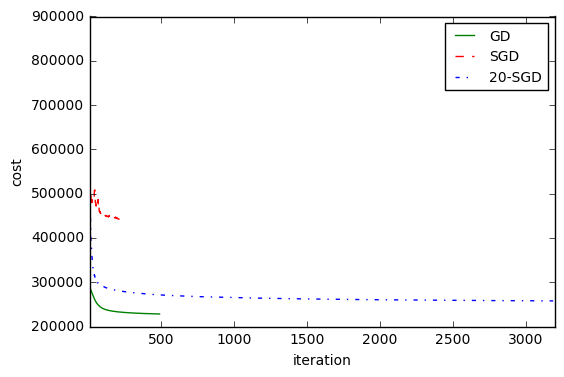

In [9]:
itr_start = 10
plt.plot(svm_obj[itr_start:], 'g-', label='GD')
plt.plot(sgdsvm_obj[itr_start:], 'r--', label='SGD')
plt.plot(mnbatsvm_obj[itr_start:], 'b-.', label='20-SGD')
plt.xlim(itr_start, max(len(svm_obj), len(sgdsvm_obj), len(mnbatsvm_obj)))
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend(fontsize=10)
plt.show()

In [6]:
repeat = 30
svm_time = []
sgdsvm_time = []
mnbatsvm_time = []

for i in xrange(repeat):
    start = time.time()
    svm(y, X, C)
    end = time.time()
    svm_time.append(end - start)

    start = time.time()
    sgd_svm(y, X, C)
    end = time.time()
    sgdsvm_time.append(end - start)

    start = time.time()
    mnBat_svm(y, X, C)
    end = time.time()
    mnbatsvm_time.append(end - start)

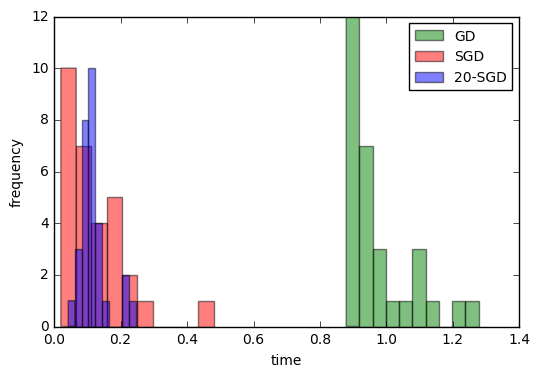

In [7]:
plt.hist(svm_time, color='g', alpha=0.5, label='GD')
plt.hist(sgdsvm_time, color='r', alpha=0.5, label='SGD')
plt.hist(mnbatsvm_time, color='b', alpha=0.5, label='20-SGD')
plt.xlabel('time')
plt.ylabel('frequency')
plt.legend(fontsize=10)
plt.show()